# Data preprocessing

Importing the libraries
Importing the Dataset
Handling of Missing Data
Handling of Categorical Data
Splitting the dataset into training and testing datasets
Feature Scaling

In [1]:
#libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
# used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

### Data Import

In [9]:
dataset = pd.read_csv('salary_EDA_Session.csv') # to import the dataset into a variable

/home/rajat/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


https://stackoverflow.com/questions/31593201/how-are-iloc-ix-and-loc-different

### Raw analysis

In [15]:
dataset.shape

(148654, 13)

In [45]:
dataset.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,28627.78,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,28627.78,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,28627.78,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,28627.78,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,28627.78,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


## Analyzing variable behaviour

#### According to our analysis, 
1. 'BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits' these varaibles seem to be numeric
2. And these 'Id','EmployeeName','JobTitle' , Year,	Notes,	Agency,	Status can be considered categorical

##### (hold up, is 'Year' really a categorical variable, think!!!!)

In [22]:
dataset['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., '6.04', '15.5',
       'Not Provided'], dtype=object)

1. It seems that all the numeric varaible has this string called as 'Not Provided' which can be replaced with 0, as its the obvious option we can think of

#### Replacement

In [29]:
dataset[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']] = dataset[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']].replace(['Not Provided'],[0])

##### Also we need to make sure that whatever numeric and categorical variables we have should have the valid datatype. So we can use .astype() attribute in pandas for this

Categorical

In [24]:
dataset[['Id','EmployeeName','JobTitle']] = dataset[['Id','EmployeeName','JobTitle']].astype(object)

Numeric

In [31]:
dataset[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']] = dataset[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']].astype(float)

##### now we are all set to do rest of the transformations

In [47]:
categorical = dataset.select_dtypes(include=[np.object])
categorical = categorical.columns
numeric = dataset.select_dtypes(include=[np.int,np.float])
numeric = numeric.columns

In [93]:
numeric

Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'Year', 'Notes'],
      dtype='object')

## Handling of Missing Data:

In [32]:
dataset.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [43]:
### Null value percentage
dataset.isna().sum()/dataset.shape[0]*100

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.000000
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64

##### First of all, we see more than 10% null values in Benefits, Notes, and Status, so we immediately remove these variables. If you still want to use some variables, make sure you use very strong imputation technique which will adapt the data behaviour properly

1. The first idea is to remove the lines in the observations where there is some missing data. 
2. But that can be quite dangerous because the data point may contain crucial information. It would be quite dangerous to remove an observation. 
3. So we need to figure out a better idea to handle this problem. And another idea that’s actually the most common idea to handle missing data is to take the mean of the columns.


#### As we can clearly see that, variables BasePay, Benefits, Notes, and Agency are the ones with null values. Lets decide strategies to tackle this

#### 1. BasePAY

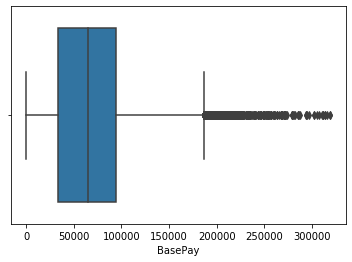

In [36]:
sns.boxplot(dataset['BasePay'])

##### Here we see that there are lot of outliers in BasePay, so we have to impute the NaNs with median, because if we use mean, thge outliers will try to pull the mean towards them, and our imputation would not be that great. So whenever you have outliers in you variable use median

In [39]:
dataset['BasePay'].fillna(dataset['BasePay'].median(),inplace=True)

#### 2.Benefits 

We already know that this variable has around 24% null values, but we will still try to make some use of this variable

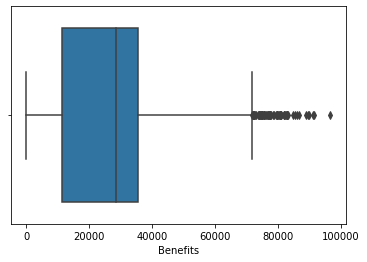

In [40]:
sns.boxplot(dataset['Benefits'])

#### Similar behaviour as BasePay

In [44]:
dataset['Benefits'].fillna(dataset['Benefits'].median(),inplace=True)

### What about categorical Varaibles, what if they have NaNs
1. Simple funda, just impute the mode of the variable meaning the most occuring category of that variable

# Data Transformation

Reasons for Data Transformation
We transform features primarily for the following reasons:

** Mandatory transformations for data compatibility. Examples include:

1. Converting non-numeric features into numeric. You can’t do matrix multiplication on a string, so we must convert the string to some numeric representation.
2. Resizing inputs to a fixed size. Linear models and feed-forward neural networks have a fixed number of input nodes, so your input data must always have the same size. For example, image models need to reshape the images in their dataset to a fixed size.

** Optional quality transformations that may help the model perform better. Examples include:

1. Tokenization or lower-casing of text features.
2. Normalized numeric features (most models perform better afterwards).
3. Allowing linear models to introduce non-linearities into the feature space.

Strictly speaking, quality transformations are not necessary--your model could still run without them. But using these techniques may enable the model to give better results.

## Handling of Categorical Data:

In [56]:
### Mandatory Transform

1. You can guess that since machine learning models are based on mathematical equations you can intuitively understand that it would cause some problem if we keep the text here in the categorical variables in the equations
2. because we would only want numbers in the equations. So that’s why we need to encode the categorical variables. 
3. That is to encode the text that we have here into numbers. To do this we use the following code snippet.

### mainly two types of encoding ( there are actually a lot of them which we will discuss in our workshop session)
1. LabelEncoding
2. OneHot Encoding

In [46]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

In [48]:
categorical

Index(['Id', 'EmployeeName', 'JobTitle', 'Agency', 'Status'], dtype='object')

In [51]:
for i in categorical:
    print('Categories in' , i, dataset[i].nunique(),'\n')

Categories in Id 148654 

Categories in EmployeeName 110811 

Categories in JobTitle 2159 

Categories in Agency 1 

Categories in Status 2 



So we cant use Id, EmployeeName as our features, as they have insane number of categories, which doesnt even make sense to feed it into our model. Also, agency has only one category which is of no use so, lets just drop the feature

Lets just Encode JobTitle

In [53]:
le_1 = LabelEncoder()
dataset['JobTitle'] = le_1.fit_transform(dataset['JobTitle'])

#### similar to this if you have few categories, we can use one hot encoding. One hot basicaly create a binarized vector.
1. Suppose you have 4 categories, namely Blue,Orange,Red,Green.
2. If you decide to use one hot encoding, then Blue will be represented as [1 0 0 0]
3. Similarly, Red is [0 1 0 0]

# Splitting the dataset into training and testing datasets:

1. Any machine learning algorithm needs to be tested for accuracy. 
2. In order to do that, we divide our data set into two parts: training set and testing set. 
3. As the name itself suggests, we use the training set to make the algorithm learn the behaviours present in the data and check the correctness of the algorithm by testing on testing set. 
In Python, we do that as follows:

In [54]:
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable /Class

In [55]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Here, we are taking training set to be 80% of the original data set and testing set to be 20% of the original data set. This is usually the ratio in which they are split. But, you can come across sometimes to a 70–30% or 75–25% ratio split. But, you don’t want to split it 50–50%. This can lead to Model Overfitting. 


# Feature Scaling:

Optional Transform

Many a times our variables don’t have the same scale. This causes some issues in our machinery models. And why is that. It’s because your machine models a lot of machinery models are based on what is called the Euclidean distance.

We use feature scaling to convert different scales to a standard scale to make it easier for Machine Learning algorithms. We do this in Python as follows:


#### There are many methods of Feature scaling, these are only for Numeric Variable

1. scaling to a range - MinMaX Scaling
2. clipping
3. log scaling - Log Transformations
4. z-score - Maths Blah blah blah!!!

#### ALSO A GOOD TECHNIQUE
5. Bucketing -  Creating bins!

In [59]:
## Lets take one variable and perform all these operations, we will use BasePay

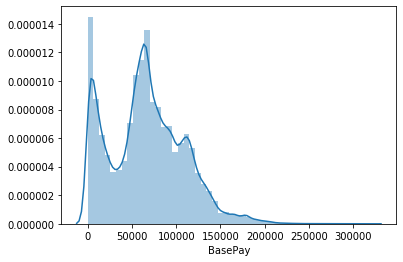

In [60]:
sns.distplot(dataset['BasePay'])

The distribution doesnt seem good, its a bit skewed and we need to do something!

#### 1. Min-Max Scaling

Formula for this - 

X_std = (X - min(X) / (max(X) - min(X)))

In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
var = dataset['BasePay']
var = min_max.fit_transform(np.array(var).reshape(-1,1))

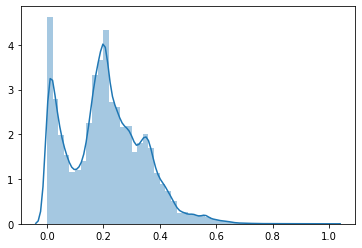

In [64]:
sns.distplot(var)

If you see closely, the distribution shape is same, only the values are scaled down between 0 and 1

#### 2. Log scaling

In [76]:
var_log = dataset['BasePay']
var_log[var_log<0] = 0 ## I had got some values less than 0, so yes we had to make them zero!
var_log = np.log1p(var_log)

/home/rajat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


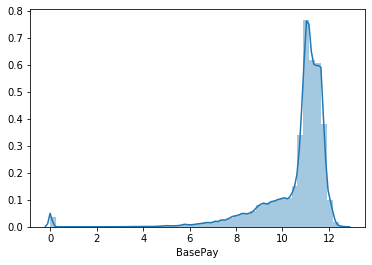

In [77]:
sns.distplot(var_log)

#### 3. Z score

formula - 

z = (x - u) / s

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var_z = dataset['BasePay']
var_z = scaler.fit_transform(np.array(var_z).reshape(-1,1))

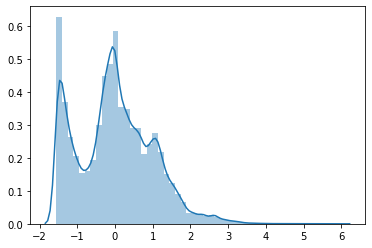

In [79]:
sns.distplot(var_z)

If you see closely, the distribution shape is same, only the values are scaled down between 0 and 1

#### 4. Feature Clipping

Feature Clipping
If your data set contains extreme outliers, you might try feature clipping, which caps all feature values above (or below) a certain value to fixed value. For example, you could clip all temperature values above 40 to be exactly 40.

You may apply feature clipping before or after other normalizations.

##### As we had discovered in BasePay that there outliers in data, so lets just clip the variable by 75 percentile +IQR value of the data

#### Using IQR

<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png">

In [80]:
dataset['BasePay'].describe()

count    148654.000000
mean      66318.304435
std       42678.405791
min           0.000000
25%       33840.505000
50%       65006.930000
75%       94605.740000
max      319275.010000
Name: BasePay, dtype: float64

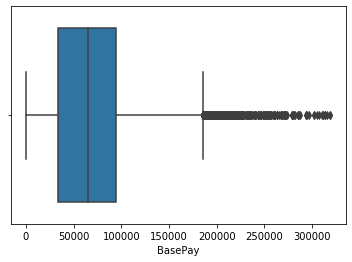

In [83]:
sns.boxplot(dataset['BasePay'])

In [89]:
iqr = 94605.740000 - 33840.505000
## Inter Quartile Range
94605.740000 + 1.5*iqr

185753.59250000003

In [90]:
var_clip = dataset['BasePay'].clip(0,185753.59250000003)

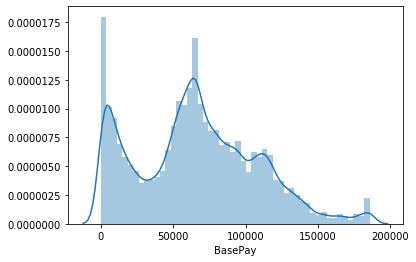

In [91]:
sns.distplot(var_clip)

#### 4. Bucketing
Here we create buckets of variable

###### So there were all the essential preprocessing steps you can follow, but what after this, what do we do after preprocessing the data.     Stay Tuned for our next sesion !!!